# Imports

In [1]:
import math
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats
#
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
from sklearn.decomposition import PCA
import warnings
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import OneHotEncoder, normalize, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

# Leer Datos

In [2]:
datosRecientes = pd.read_csv("university_admission_test.csv",delimiter=",",index_col=0, na_values=[" ","?"])
df_recent = datosRecientes.copy()
datosTrain = pd.read_csv("university_admission_train.csv",delimiter=",",index_col=0, na_values=[" ","?"])
df_train = datosTrain.copy()

# Entendimiento de los Datos

In [3]:
df_train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,432,320,94,2,1.38,3.50,8.78,1,73.00


In [4]:
df_train.shape

(1569, 9)

Primero contamos con 1569 registros y 9 columnas en nuestro DataFrame

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         1569 non-null   int64  
 1   GRE Score          1569 non-null   int64  
 2   TOEFL Score        1569 non-null   int64  
 3   University Rating  1569 non-null   int64  
 4   SOP                1569 non-null   float64
 5   LOR                1569 non-null   float64
 6   CGPA               1569 non-null   float64
 7   Research           1569 non-null   int64  
 8   Admission Points   1504 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 122.6 KB


Tenemos 5 columnas con valores enteros y 4 float

In [6]:
df_train.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Admission Points     65
dtype: int64

Admission points tiwene 65 valores nulos

In [7]:
df_train.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1504.000000
mean,239.022945,307.669216,101.632250,2.873805,2.980848,3.013907,8.342231,0.469726,66.744328
std,149.802641,17.857559,12.386238,1.245147,1.234802,1.214377,0.812729,0.499242,19.253029
min,1.000000,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,94.000000,298.000000,96.000000,2.000000,2.000000,2.050000,7.750000,0.000000,48.000000
50%,236.000000,309.000000,104.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,377.000000,322.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,84.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


## Completitud

In [8]:
# Ver el porcentaje de atributos vacios
df_porcentajes = (100*df_train.isna().sum()/len(df_train)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
Admission Points,4.142766
Serial No.,0.000000
GRE Score,0.000000
TOEFL Score,0.000000
University Rating,0.000000
SOP,0.000000
LOR,0.000000
CGPA,0.000000
Research,0.000000


El 4.14% de los datos de la columna Admission points son nulos, el resto de atreibutos están completos

In [9]:
df_train.dropna(inplace=True)

## Unicidad

In [10]:
num_duplicated = df_train.duplicated().sum()
print(f"{id}: {num_duplicated}")

<built-in function id>: 18


Hay 18 duplicados

In [11]:
df_train.drop_duplicates(inplace=True)

## Validez

Los datos son válidos por el momento, nop hay valores, atipicos, hay valores nulos en la columna objetivo.

## Consistencia

Los datos son validos porque no hay ninguna regla que se incumpla en los valores que toman los registros en cada columna

# Preprocesamiento

In [12]:
# Eliminamos los registros que tienen la variable objetivo nula
df_train = df_train.dropna(subset = ['Admission Points'])

## Diagramas de Dispersión

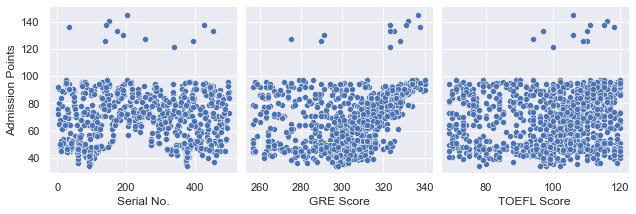

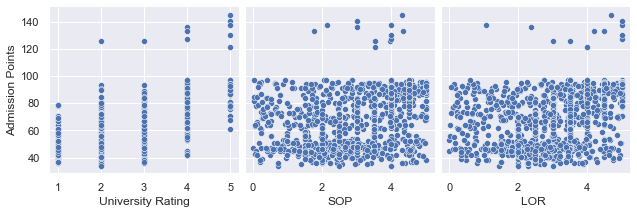

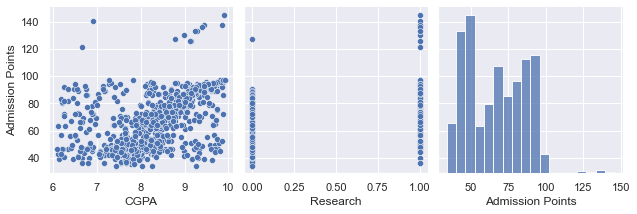

In [13]:
sns.pairplot(df_train, height=3, y_vars = 'Admission Points', x_vars = df_train.columns[0:3], kind='scatter')
sns.pairplot(df_train, height=3, y_vars = 'Admission Points', x_vars = df_train.columns[3:6], kind='scatter')
sns.pairplot(df_train, height=3, y_vars = 'Admission Points', x_vars = df_train.columns[6:], kind='scatter')


Vemos que las variables con más relación con Admission points son:
- Research
- CGPA
- University Rating

## Matriz de Correlaciones

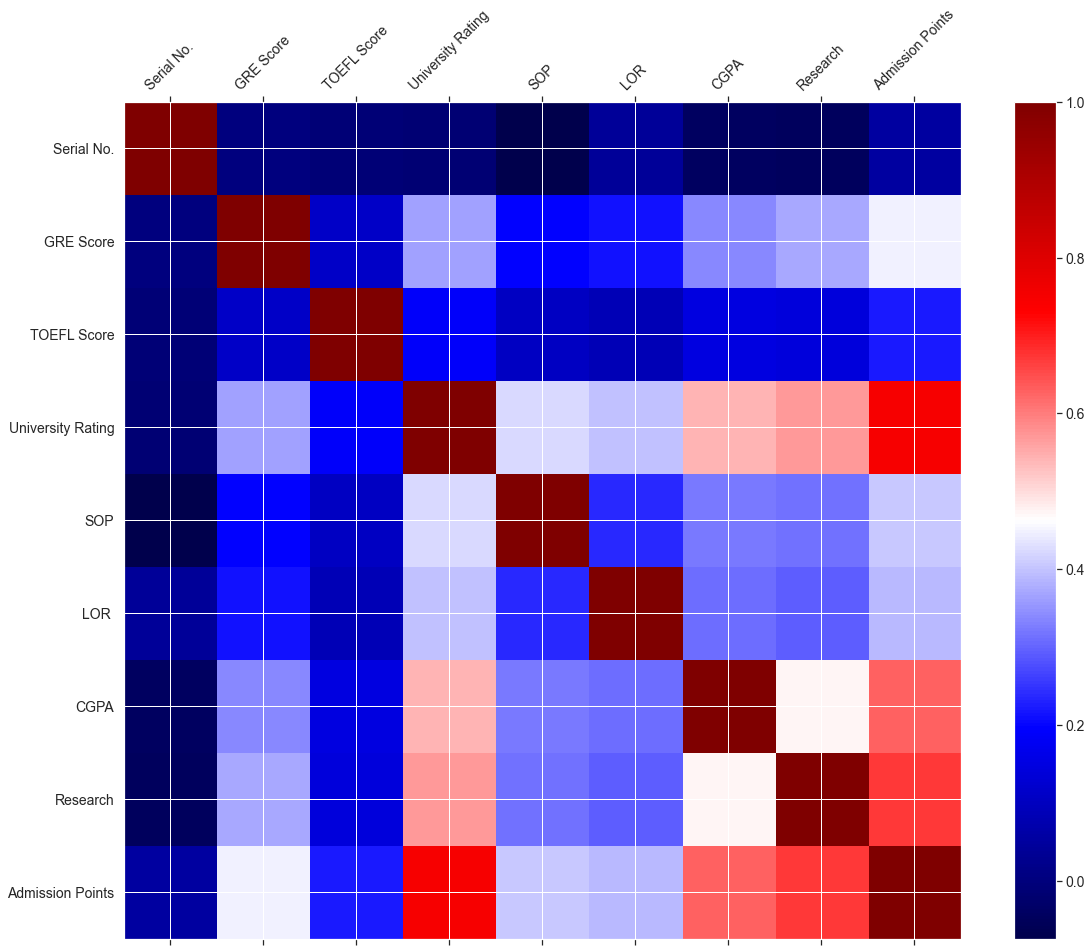

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_train.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

## Estandarización de los datos

In [15]:
# En datos de entreno
scaler = StandardScaler()
scaler.fit(df_train.drop('Admission Points', axis = 1))
scaled_data = scaler.transform(df_train.drop('Admission Points', axis = 1))
scaled_data = pd.DataFrame(scaled_data)
scaled_data_2 = scaled_data.set_axis(df_train.drop('Admission Points', axis = 1).columns.values.tolist(), axis=1, inplace=False)
scaled_data_2['Admission Points'] = df_train['Admission Points']

# También en los datos de prueba
scaler.fit(df_recent)
scaled_recent = pd.DataFrame(scaler.transform(df_recent))
scaled_recent_2 = scaled_recent.set_axis(df_recent.columns.values.tolist(), axis=1, inplace=False)

In [16]:
scaled_data_2.dropna(inplace = True)

# Regresión Básica

En este paso se seleccionan las columnas a utilizar en la variable pre y se le indica al pipeline que se realice una regresion lineal con la variable model

In [17]:
#selected_cols = ['Research','CGPA','University Rating']
#selected_cols = ['Research','CGPA','University Rating', 'GRE Score', 'TOEFL Score', 'SOP', 'Research']
selected_cols = ['Research','CGPA','University Rating', 'GRE Score', 'TOEFL Score', 'SOP']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

# Modelo
model = [('model', LinearRegression(normalize = True))]

# Decalra el pipeline
pipeline = Pipeline(pre+model)

# Extraemos las variables explicativas y objetivo para entrenar
X = scaled_data_2.drop('Admission Points', axis = 1)
y = scaled_data_2['Admission Points']

pipeline = pipeline.fit(X,y)

### Visualización

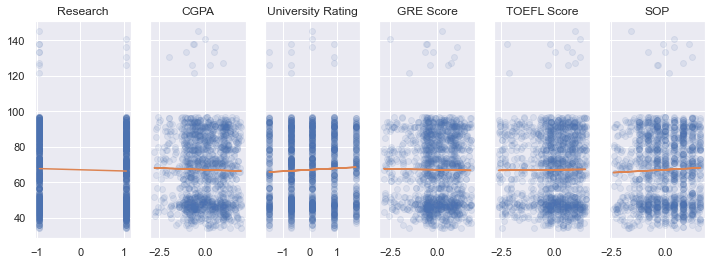

In [18]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)


### Exportar e Importar el Modelo 

Se guarda el pipeline en el archivo pipeline.joblib y se carga en p2

In [19]:
# Usamos la lbreria joblib
filename = 'pipeline.joblib'
# Se guarda
dump(pipeline, filename) 
# Se lee
p2 = load(filename)

### Predicción

<AxesSubplot:xlabel='Admission Points', ylabel='Count'>

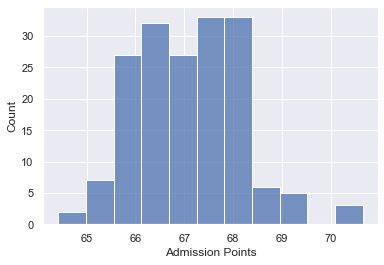

In [20]:
# Clasificamos los datos recientes
scaled_recent_2['Admission Points'] = p2.predict(scaled_recent_2)
sns.histplot(scaled_recent_2['Admission Points'])

### Coeficientes

In [21]:
pipeline['model'].coef_

array([-0.68961909, -0.38841544,  0.84289891, -0.19095747,  0.13268859,
        0.66286502])

In [22]:
# En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,Research,-0.689619
1,CGPA,-0.388415
2,University Rating,0.842899
3,GRE Score,-0.190957
4,TOEFL Score,0.132689
5,SOP,0.662865


### Métricas

#### Coeficiente de Determinación R cuadrado

In [23]:
p2.score(X,y)

0.002950766627587975

El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Mientras sea más cercano a 1 mayor será el ajuste del modelo a la variable que estamos intentando explicar

#### Root-Mean-Square Error (RMSE) 

In [24]:
y_true = y
y_predicted = p2.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

19.2540724873172

Desviación estandar, indica que tan lejos están los puntos de la línea de regresión

## Supuestos de la Regresión Lineal

### Colinealidad

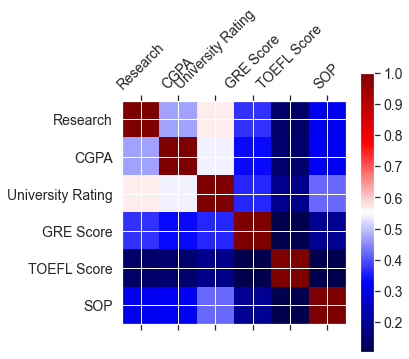

In [25]:
df_temp = df_train[selected_cols]


f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

### Linealidad

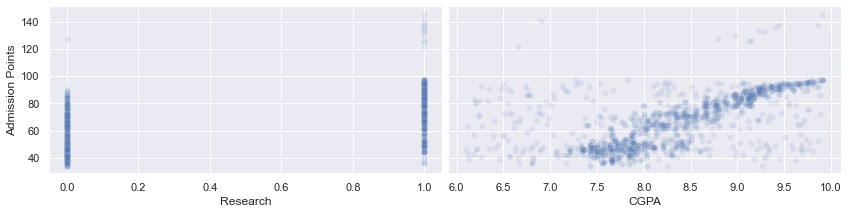

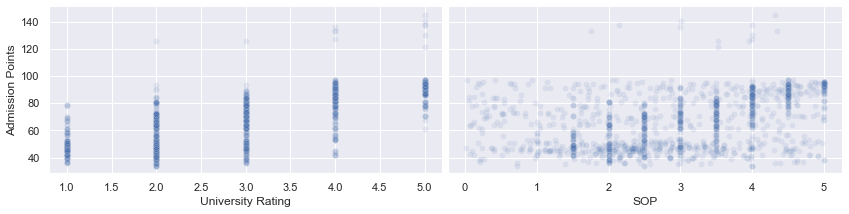

In [26]:
sns.pairplot(df_train, height=3, aspect = 2, y_vars = 'Admission Points', x_vars = ['Research','CGPA'], kind='scatter', plot_kws = {'alpha':0.1})
sns.pairplot(df_train, height=3, aspect = 2, y_vars = 'Admission Points', x_vars = ['University Rating', 'SOP'], kind='scatter', plot_kws = {'alpha':0.1})

### Normalidad de los errores

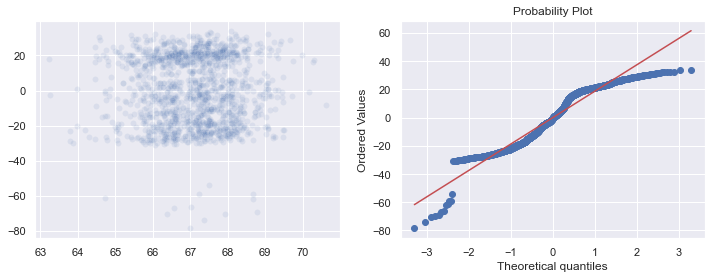

In [27]:
X = scaled_data_2.drop('Admission Points', axis = 1)
y = scaled_data_2['Admission Points']

# Calculamos los errores
errors = (p2.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p2.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

# Regresión eliminando valores atípicos

## Diagrama de caja

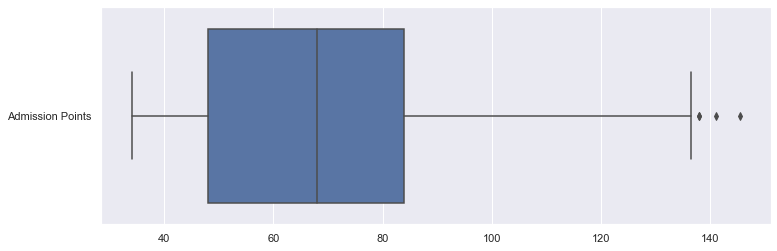

In [28]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= scaled_data_2[['Admission Points']], orient="h")

## Eliminar filas con valores atípicos

In [29]:
scaled_data_3 = scaled_data_2.copy()
#filtro = scaled_data_3['Admission Points'] <= 138
filtro = scaled_data_3['Admission Points'] <= 140

scaled_data_3 = scaled_data_3[filtro]

## Modelo sin valores atípicos

Se declara de nuevo el pipéline, se cambian las columnas seleccionadas y se hace una regresdion lineal, esta vez los datos con el que se va a entrenar el pipeline no contienen los datos atipicos.

In [30]:
#selected_cols = ['Research','CGPA','University Rating']
#selected_cols = ['CGPA', 'GRE Score']
selected_cols = ['University Rating', 'CGPA', 'Research', 'SOP']


pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

# Modelo
model = [('model', LinearRegression(normalize = True))]

# Decalra el pipeline
pipeline = Pipeline(pre+model)

# Extraemos las variables explicativas y objetivo para entrenar
X = scaled_data_3.drop('Admission Points', axis = 1)
y = scaled_data_3['Admission Points']

p3 = pipeline.fit(X,y)

## Visualización

<AxesSubplot:xlabel='Admission Points', ylabel='Count'>

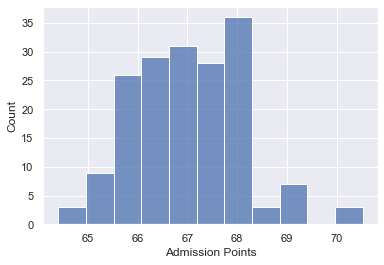

In [31]:
scaled_recent_2['Admission Points'] = p3.predict(scaled_recent_2)
sns.histplot(scaled_recent_2['Admission Points'])

## Métricas

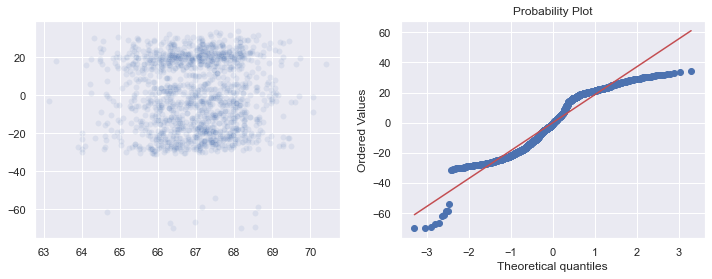

In [32]:
# Calculamos los errores
errors = (p3.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p3.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

### Varianza Constante

<AxesSubplot:xlabel='Admission Points'>

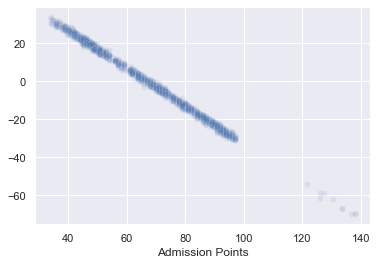

In [33]:
# Visualizamos nuestros datos
sns.scatterplot(data  = scaled_data_3, x = 'Admission Points', y = errors, alpha = 0.1)

In [34]:
p3.score(X,y)

0.003064867616039968

# Regresión Creando nuevas columnas

Se crea otro pipleine llamado p_temp para propbar un modelo igual que el anterior pero con nuevas columnas.

In [35]:
scaled_data_4 = scaled_data_3.copy()


# Creamos la variable
scaled_data_4['Research_2'] = scaled_data_4['Research']**2
scaled_data_4['CGPA_2'] = scaled_data_4['CGPA']**2
scaled_data_4['UR_2'] = scaled_data_4['University Rating']**2
scaled_data_4['SOP_2'] = scaled_data_4['SOP']**2



# columnas
selected_cols = ['Research_2','CGPA_2','UR_2', 'SOP_2']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

# Extraemos las variables explicativas y objetivo para entrenar
X = scaled_data_4.drop('Admission Points', axis = 1)
y = scaled_data_4['Admission Points']

p4 = p_temp.fit(X,y)

## Métricas

<AxesSubplot:xlabel='Admission Points'>

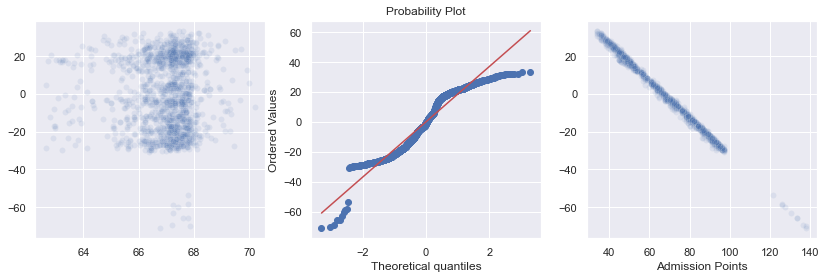

In [36]:
# Calculamos los errores
errors = (p4.predict(X) - y).values

fig, axes = plt.subplots(1, 3, figsize = (14,4))

# Dispersión
sns.scatterplot(x = p4.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

sns.scatterplot(data  = scaled_data_4, x = 'Admission Points', y = errors, alpha = 0.1, ax = axes[2])

## Predicción

<AxesSubplot:xlabel='Admission Points', ylabel='Count'>

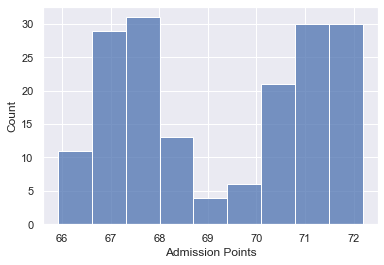

In [37]:
df_recent_2 = df_recent.copy()

df_recent_2['Research_2'] = df_recent_2['Research']**2
df_recent_2['CGPA_2'] = df_recent_2['CGPA']**2
df_recent_2['UR_2'] = df_recent_2['University Rating']**2
df_recent_2['SOP_2'] = df_recent_2['SOP']**2


scaler.fit(df_recent_2)
scaled_recent_3 = pd.DataFrame(scaler.transform(df_recent_2))
scaled_recent_3 = scaled_recent_3.set_axis(df_recent_2.columns.values.tolist(), axis=1, inplace=False)

scaled_recent_3['Admission Points'] = p4.predict(scaled_recent_3)
sns.histplot(scaled_recent_3['Admission Points'])

In [38]:
p4.score(X,y)

0.002945753822940378

## Mejor modelo 
 
El mejor modelo fue el p3 con un score de 0.003064867616039968 como se mira en la celda 34 del notebook.

Se sobreescribe el pipeline en el archivo pipeline.jopblib

In [39]:
# Se gruada el pipeline en el archivo pipeline.joblib
dump(p3, 'pipeline.joblib')

['pipeline.joblib']

## Evaluación cuantitativa

El mejor modelo tiene un coeficiente de determinación de 0.00295, por lo tanto se recomienda seguir empleando los exámenes  para determinar el puntaje de admisión.
Si no se desea continuar con los exámenes, se recomienda determinar el puntaje de admisión en base a los atributos de University Rating, CPGA, SOP y Research Experience  de cada estudiante.


## Evaluación cualitativa

Suponiendo un comportamiento lineal los coeficientes más cercanos a cero son los que nos dan un mejor modelo, sin embargo los datos presentaban mucho ruido y esto llevó a que los coeficientes de regresión y el coeficiente de correlación nos indicasen que el modelo no es confiable.